# <p style="color:blue">Bike Sharing Assignment</p>

#### <p style="color:red">Problem Statement</p>
  A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
 
 
  They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
 
 
 
      1.Which variables are significant in predicting the demand for shared bikes.
      2.How well those variables describe the bike demand
      
#### <p style="color:green">Business Goal</p>
  We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

### Importing and Understanding Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing csv data
bike = pd.read_csv("./day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.shape

(730, 16)

we see that, there are 16 columns out of which <b>cnt</b> is target variable

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 88.5+ KB


From info we can say there are no missing values

In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

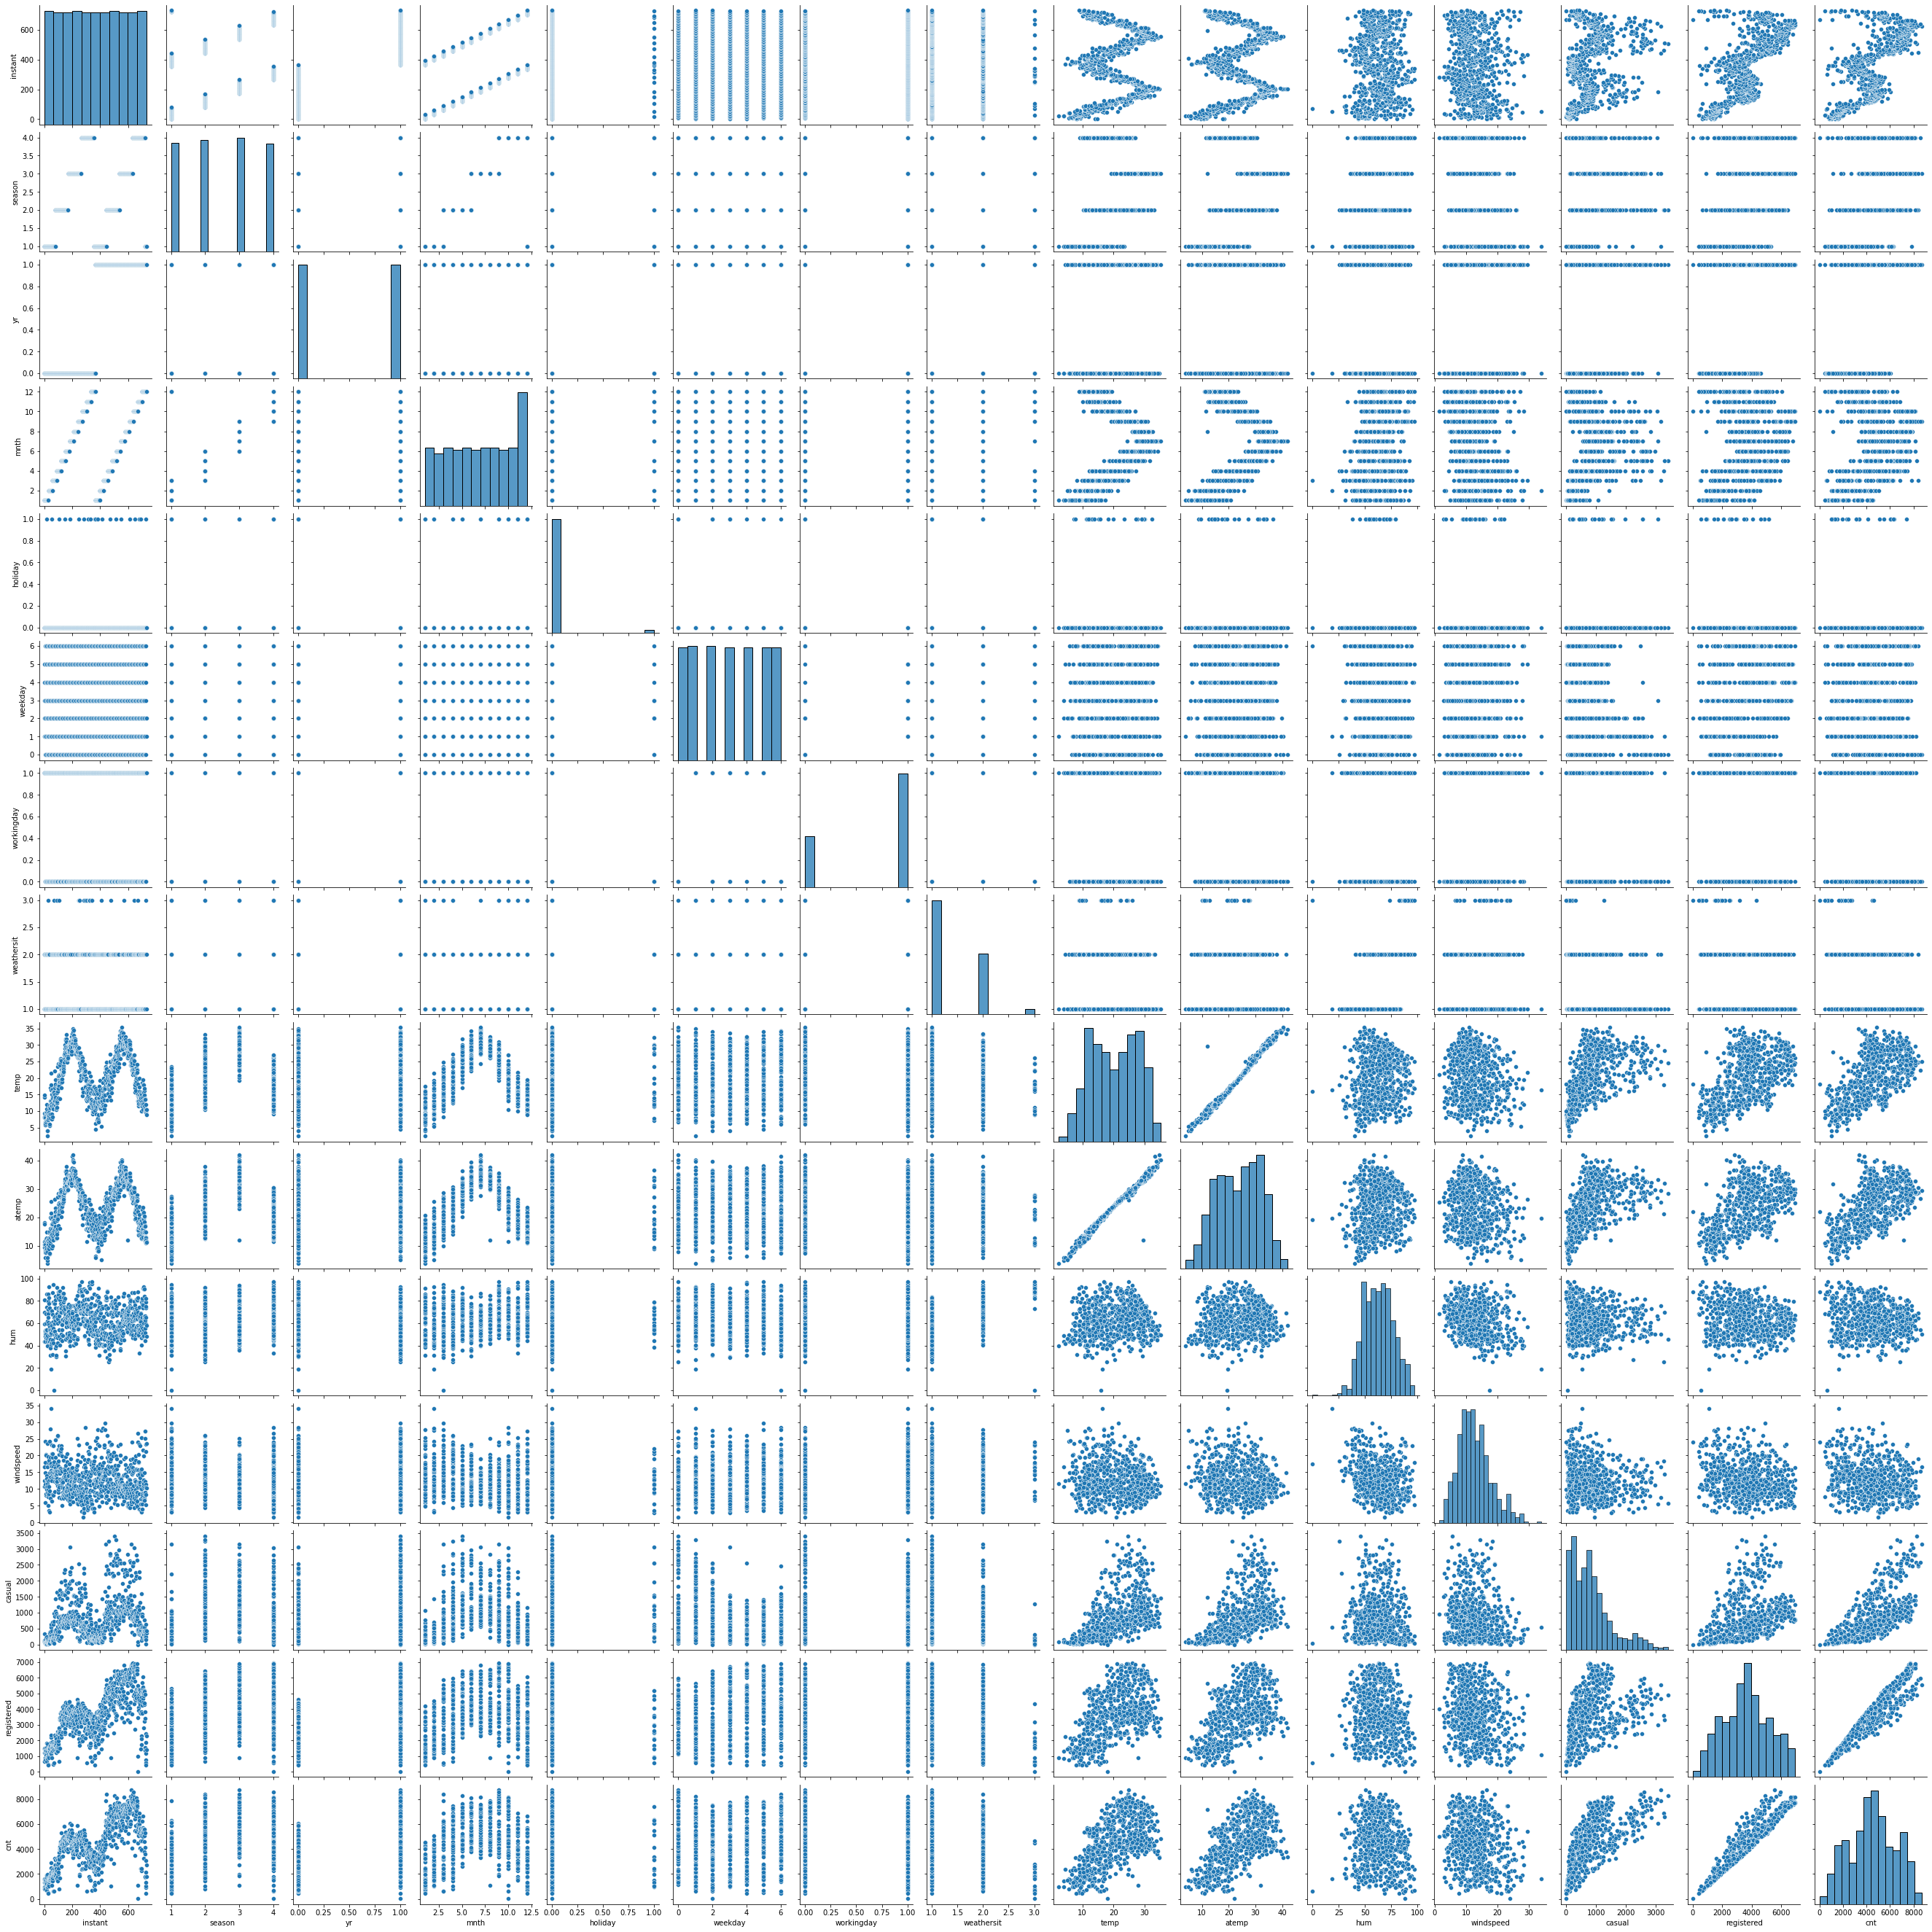

In [7]:
sns.pairplot(bike)
plt.show()

##### Based on following reasons we can elimate this columns,


- We see, there are more then 10 numerical variables and also <b> cnt =  registered + casual </b>. So registered and casual become redundent in analysis.

- instant: we see, this just index so there is no major part in analysis  



In [8]:
# variables that needs to drop
varlist =  ['registered', 'casual', 'instant']
bike.drop(varlist, axis=1, inplace=True)

### There are many categarical variable which are in form of numerical. Lets take look at them.

#### Lets encode them to categorical after looking into them.


In [9]:
bike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [10]:
bike.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [11]:
bike.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [12]:
bike.weekday.value_counts() 

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [13]:
bike.yr.value_counts()

1    365
0    365
Name: yr, dtype: int64

- Encoding Weathersit as [1-clear, 2-mist, 3-snow, 4-rain]
- seasons as [1:spring, 2:summer, 3:fall, 4:winter]
- workingday as [1: no holiday, 0: holiday]
- yr as [ (0: 2018, 1:2019)]



In [14]:
encode_columns =  { 
                   "weathersit":  {1: 'clear', 2: 'mist', 3: 'snow', 4: 'rain' },
                   "season"    :  {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'},
                   "weekday"   :  {0:'Sunday',1:'Mon',2:'Tue',3:'Wed',4:'Thur',5:'Fri',6:'Sat'},
                   "yr"        :  {0: "2018", 1: "2019"},
                   "mnth"      :  {1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',7: 'Jul', 8: 'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec'}
                  }

bike.replace(encode_columns, inplace=True)

#### Lets visualize the categorical Data 

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

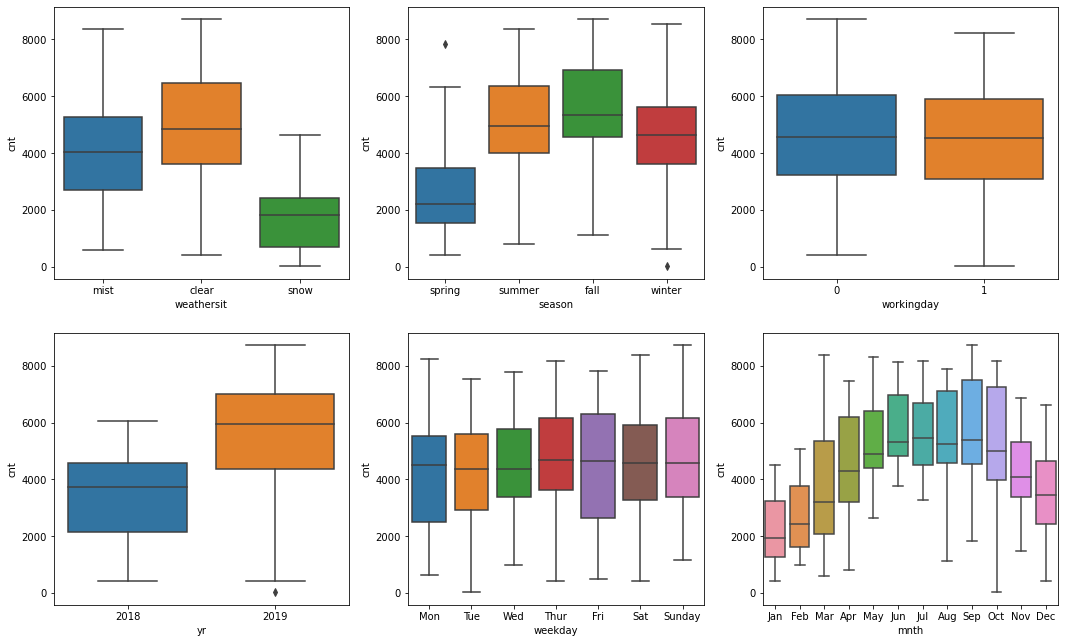

In [15]:
fig = plt.figure(figsize=(18,17))

#  subplot #1
plt.subplot(331)
sns.boxplot(x='weathersit', y='cnt',  data= bike)

#  subplot #2
plt.subplot(332)
sns.boxplot(x='season', y='cnt', data=bike)

plt.subplot(333)
sns.boxplot(x='workingday', y='cnt',  data= bike)

#  subplot #2
plt.subplot(334)
sns.boxplot(x='yr', y='cnt', data=bike)

plt.subplot(335)
sns.boxplot(x='weekday', y='cnt',  data= bike)

#  subplot #2
plt.subplot(336)
sns.boxplot(x='mnth', y='cnt', data=bike)


### We see there are some interesting patterns among categorical data Lets look at them individual 

In [16]:
def categoricalPlot(x):
    sns.barplot(x=x, y="cnt", data=bike)
    plt.show()
   

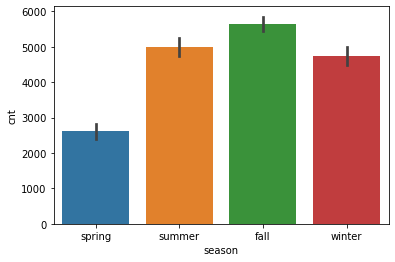

In [17]:
#season column
categoricalPlot("season")

We can notice here, in spring season there is low trend in opting bike and it also indicate that the season is good predictor of dependent variabale

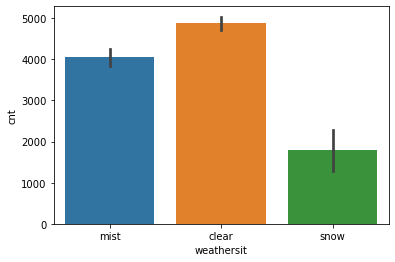

In [18]:
categoricalPlot("weathersit")

Here we can clearly identify during Snow fall people prefer bike very less and also weathersit good indicator of dependent varibale

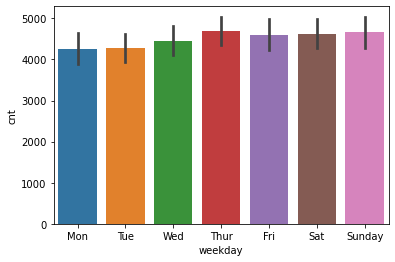

In [19]:
categoricalPlot("weekday")

We see there is almost same trends in weekdays

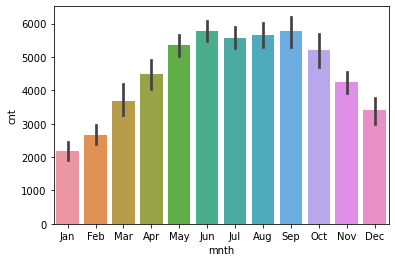

In [20]:
categoricalPlot("mnth")

We see there is some trend in months it may have correlation with  weathersit and season. It indicate it is good predictor  

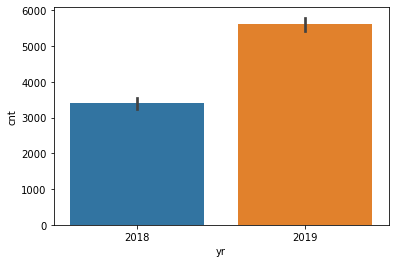

In [21]:
categoricalPlot("yr")

Number of user increase as year increase. This is good sign of progress 

## Step 3: Data Preparation

- You can see that your dataset has many columns with categorical values.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to numeric varibale.

In [22]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    object 
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 57.1+ KB


In [23]:
#Get all categorical varibales

bike_categorical = bike.select_dtypes(exclude=['int64', 'float64'])
bike_categorical.head()

,dteday,season,yr,mnth,weekday,weathersit
0,01-01-2018,spring,2018,Jan,Mon,mist
1,02-01-2018,spring,2018,Jan,Tue,mist
2,03-01-2018,spring,2018,Jan,Wed,clear
3,04-01-2018,spring,2018,Jan,Thur,clear
4,05-01-2018,spring,2018,Jan,Fri,clear


In [24]:
bike["dteday"] = bike.dteday.astype('datetime64') 

### Lets assign dummy varibales for categorical predictor in order use them in regression

In [25]:
season = pd.get_dummies(bike['season'], drop_first = True)
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [26]:
weather = pd.get_dummies(bike['weathersit'], drop_first = True)
weather.head()

,mist,snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [27]:
month = pd.get_dummies(bike['mnth'], drop_first = True)
month.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [28]:
weekday = pd.get_dummies(bike['weekday'], drop_first = True)
weekday.head()

,Mon,Sat,Sunday,Thur,Tue,Wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [29]:
year = pd.get_dummies(bike['yr'], drop_first = True)
year.head()

,2019
0,0
1,0
2,0
3,0
4,0


### Lets concate the dummy variables 

In [30]:
boom_bike =  pd.concat([bike,season,month,weather,weekday, year], axis = 1)
boom_bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,Sep,mist,snow,Mon,Sat,Sunday,Thur,Tue,Wed,2019
0,2018-01-01,spring,2018,Jan,0,Mon,1,mist,14.110847,18.18125,...,0,1,0,1,0,0,0,0,0,0
1,2018-02-01,spring,2018,Jan,0,Tue,1,mist,14.902598,17.68695,...,0,1,0,0,0,0,0,1,0,0
2,2018-03-01,spring,2018,Jan,0,Wed,1,clear,8.050924,9.47025,...,0,0,0,0,0,0,0,0,1,0
3,2018-04-01,spring,2018,Jan,0,Thur,1,clear,8.200000,10.60610,...,0,0,0,0,0,0,1,0,0,0
4,2018-05-01,spring,2018,Jan,0,Fri,1,clear,9.305237,11.46350,...,0,0,0,0,0,0,0,0,0,0


In [31]:
boom_bike.shape

(730, 36)

In [32]:
boom_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    object        
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  cnt         730 non-null    int64         
 13  spring      730 non-null    uint8         
 14  summer      730 non-null    uint8         
 15  winter      730 non-null    uint8         
 16  Aug         730 non-null  

### Lets remove the duplicate/unnecessary columns 

In [33]:
boom_bike.drop(['season','mnth','weathersit','weekday', 'yr', 'dteday'],axis=1,inplace=True)
boom_bike.shape

(730, 30)

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [34]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(boom_bike, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
boom_bike.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,Sep,mist,snow,Mon,Sat,Sunday,Thur,Tue,Wed,2019
0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [39]:
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,Sep,mist,snow,Mon,Sat,Sunday,Thur,Tue,Wed,2019
653,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,0,1,1
576,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,0,1,1
426,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,1,0,0,0,1,0,0,0,1
728,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,1,0,0,0,0,0,1
482,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,1,0,0,0,1,0,0,0,1


In [40]:
df_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,Sep,mist,snow,Mon,Sat,Sunday,Thur,Tue,Wed,2019
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.080392,0.343137,0.029412,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.507843
std,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.272166,0.475223,0.169124,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.500429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


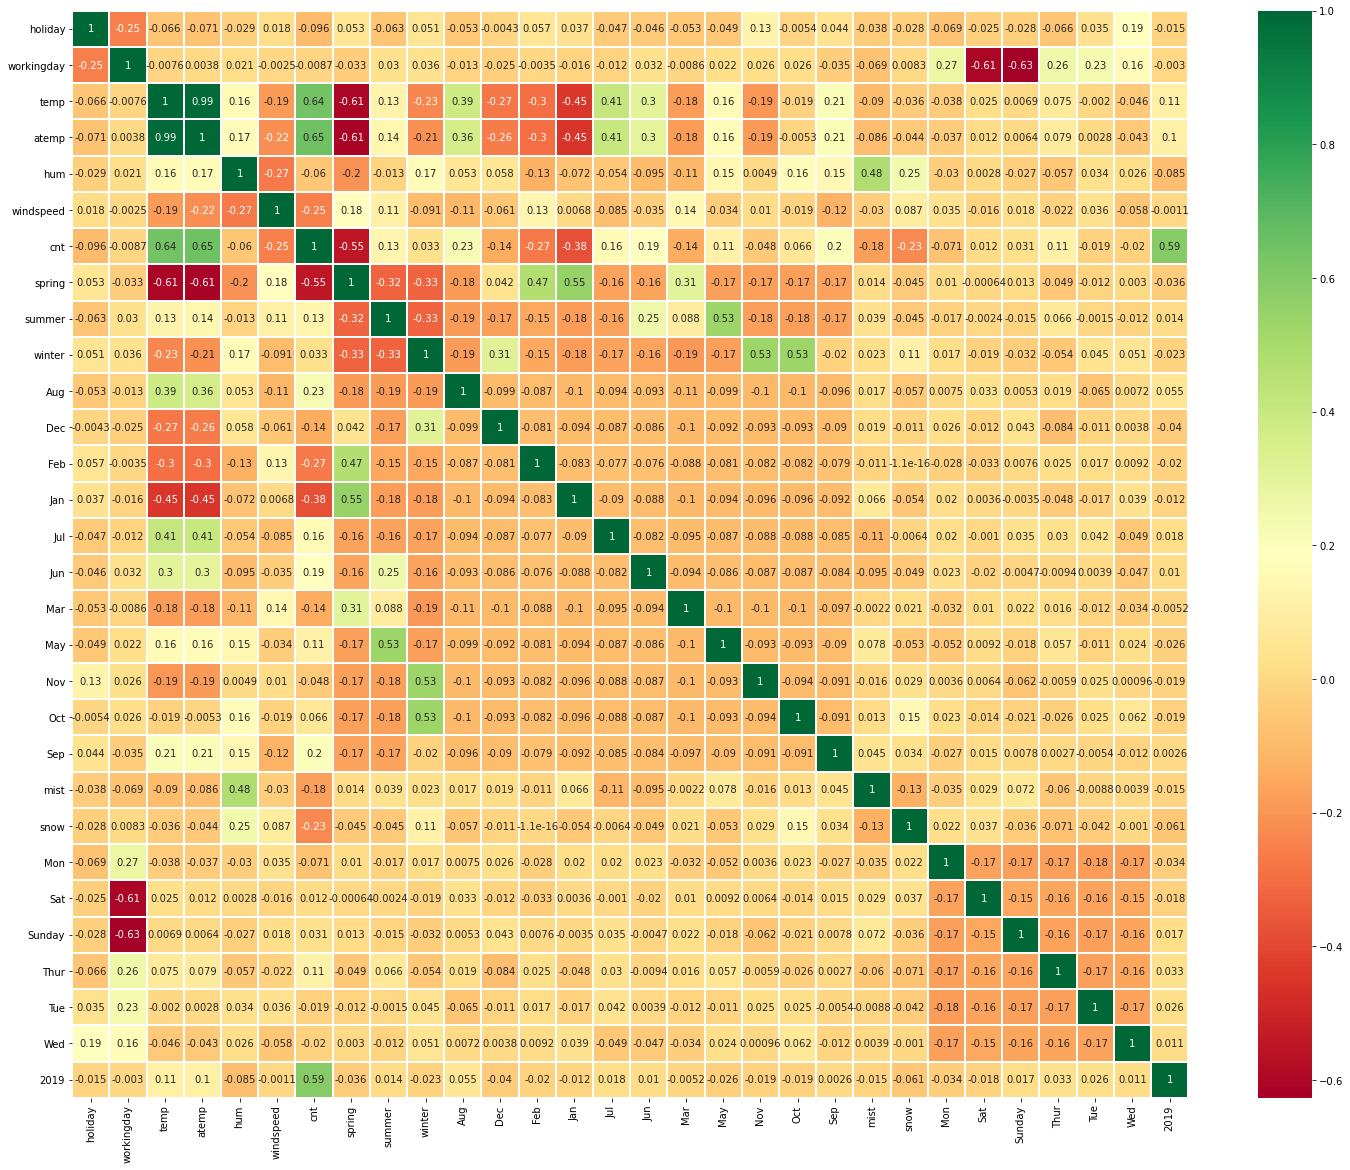

In [41]:
plt.figure(figsize = (25,20))
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", linewidth = 1)
plt.show()

As you might have noticed, `temp` seems to the correlated to `cnt` the most. Let's see a pairplot for `temp` vs `cnt`.

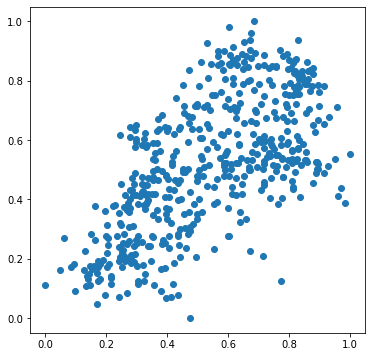

In [42]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [43]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building our model

This time, we will be using the **`LinearRegression` function from `SciKit Learn`** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [44]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [45]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [46]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 7),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('mist', True, 1),
 ('snow', True, 1),
 ('Mon', False, 9),
 ('Sat', False, 4),
 ('Sunday', False, 5),
 ('Thur', False, 13),
 ('Tue', False, 8),
 ('Wed', False, 11),
 ('2019', True, 1)]

In [47]:
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer', 'winter',
       'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'mist', 'snow', '2019'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [48]:
X_train_rfe = X_train[col]

In [49]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [50]:
lm = sm.OLS(y_train,X_train_rfe).fit()  

In [51]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Fri, 12 Mar 2021   Prob (F-statistic):          3.34e-189
Time:                        13:29:16   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3202      0.036      8.886      0.0

In [52]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.48
5,spring,5.27
2,temp,4.42
7,winter,3.83
6,summer,2.76
3,hum,1.93
11,Nov,1.76
9,Jan,1.68
13,mist,1.57
8,Dec,1.49


Insight: We see spring as highest VIF value. We will drop this predictor 

In [53]:
# Dropping highly correlated variables and insignificant variables
X = X_train_rfe.drop('spring', axis=1)
# Run the function to calculate VIF for the new model

In [54]:
# Build a second fitted model
X = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X).fit()

In [55]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Fri, 12 Mar 2021   Prob (F-statistic):          1.54e-188
Time:                        13:29:17   Log-Likelihood:                 510.40
No. Observations:                 510   AIC:                            -990.8
Df Residuals:                     495   BIC:                            -927.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2563      0.029      8.912      0.0

In [56]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.75
2,temp,2.32
6,winter,2.08
3,hum,1.90
10,Nov,1.70
8,Jan,1.67
12,mist,1.55
7,Dec,1.47
5,summer,1.44
9,Jul,1.43


Nov has high p-value.So,We will go ahead with dropping Nov 

In [57]:
X = X.drop('Nov', axis=1)
# Run the function to calculate VIF for the new model

In [58]:
# Build a third fitted model
X = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X).fit()

In [59]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Fri, 12 Mar 2021   Prob (F-statistic):          4.25e-189
Time:                        13:29:18   Log-Likelihood:                 508.96
No. Observations:                 510   AIC:                            -989.9
Df Residuals:                     496   BIC:                            -930.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2498      0.029      8.751      0.0

In [60]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,50.82
2,temp,2.25
3,hum,1.90
8,Jan,1.63
6,winter,1.55
11,mist,1.55
5,summer,1.43
9,Jul,1.43
7,Dec,1.26
12,snow,1.25


Dec has high p-value. We will go ahead with dropping Jan 

In [61]:
X = X.drop('Dec', axis=1)

In [62]:
X = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X).fit()

In [63]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Fri, 12 Mar 2021   Prob (F-statistic):          6.03e-190
Time:                        13:29:18   Log-Likelihood:                 508.17
No. Observations:                 510   AIC:                            -990.3
Df Residuals:                     497   BIC:                            -935.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2444      0.028      8.658      0.0

In [64]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.60
2,temp,2.06
3,hum,1.88
7,Jan,1.55
10,mist,1.55
6,winter,1.53
8,Jul,1.43
5,summer,1.41
11,snow,1.24
4,windspeed,1.19


In [65]:
lr_4.params

const        0.244357
holiday     -0.098557
temp         0.571678
hum         -0.176354
windspeed   -0.194470
summer       0.074483
winter       0.125850
Jan         -0.038021
Jul         -0.047122
Sep          0.094124
mist        -0.051863
snow        -0.236244
2019         0.228909
dtype: float64

### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like

In [66]:
y_train_cnt = lr_4.predict(X)

In [67]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

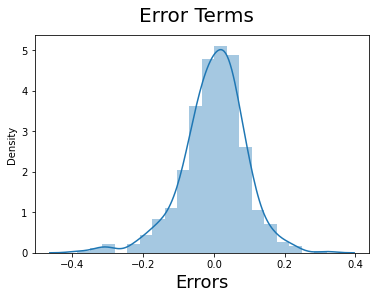

In [68]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Cross Validation

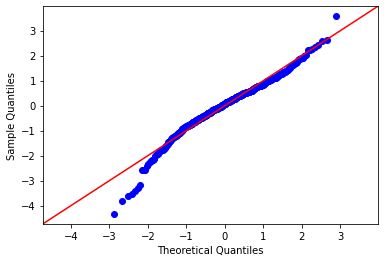

In [69]:
sm.qqplot((y_train - y_train_cnt), fit=True, line='45')
plt.show()

<b>From histogram and q-q plot we can conclude that error terms follows normal distribution</b>

 ### Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [70]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [71]:
df_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,Sep,mist,snow,Mon,Sat,Sunday,Thur,Tue,Wed,2019
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.086758,0.319635,0.027397,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.479452
std,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.282125,0.467403,0.163612,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.500722
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
y_test = df_test.pop('cnt')
X_test = df_test

In [73]:
X_train_new = X.drop(['const'], axis=1)

In [74]:
X_test_new = X_test[X_train_new.columns]

In [75]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [76]:
# Making predictions
y_pred = lr_4.predict(X_test_new)

In [77]:
from sklearn.metrics import r2_score

In [78]:
r2_score(y_test, y_pred)

0.8029170032329543

<b>Insight:</b>

- We got good r2 hence we can conclude that model is good

#### <p style="color:green">Model Summary</p>

From our model we can infer that `temp`, `winter` and `summer` influence the bike booking